# Introdução à Estatística

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import f
from scipy.stats import t

## Lista de Exercícios Complementares

####    1.  Na análise de concessão de empréstimos, uma variável potencialmente importante é a renda da pessoa. O gerente de um banco coleta uma base de dados de seus correntistas e extrai a variável “renda mensal (R$)” para 50 pessoas. Embora se trate de uma variável quantitativa, deseja realizar uma análise por meio de tabela de frequências. Neste sentido, pede-se:

In [2]:
# importando os dados de um arquivo csv
renda_mensal = pd.read_csv('renda_mensal.csv')
renda_mensal

,Renda ($)
0,2894
1,3448
2,1461
3,2224
4,2501
5,1100
6,3560
7,5511
8,2901
9,10128


#####    a. Classifique os correntistas em faixas de renda, sendo: 0-2.000; 2.001-4.000; 4.001-6.000; 6.001-8.000; 8.001-10.000 e 10.001-12.000.

In [3]:
# criando os intervalos de renda e criando um dicionário que irá mapear o dataframe (não é necessário o mapeamento dessa forma)
intervals = {range(0,2001):'0-2000',range(2001,4001):'2001-4000',range(4001,6001):'4001-6000',range(6001,8001):'6001-8000',range(8001,10001):'8001-10000',range(10001,12001):'10001-12000'} # o range() não inclui o últimom, portanto na renda = 2000 não classificava
order = {'0-2000':1,'2001-4000':2,'4001-6000':3,'6001-8000':4,'8001-10000':5,'10001-12000':6}

In [4]:
renda_mensal['faixa_salarial'] = renda_mensal['Renda ($)'].apply(lambda x: next((v for k, v in intervals.items() if x in k),0))
renda_mensal['faixa_2'] = renda_mensal['faixa_salarial'].map(order)
renda_mensal.sort_values(by='Renda ($)',inplace=True)
renda_mensal

,Renda ($),faixa_salarial,faixa_2
5,1100,0-2000,1
45,1130,0-2000,1
28,1241,0-2000,1
2,1461,0-2000,1
39,1500,0-2000,1
29,1720,0-2000,1
10,1855,0-2000,1
24,1900,0-2000,1
22,2000,0-2000,1
17,2150,2001-4000,2


#####    b. Em seguida, elabore a tabela de frequências para as faixas de renda acima.

In [5]:
faixa_salarial = renda_mensal.faixa_salarial.value_counts(sort=False).to_frame(name='Quantidade')
faixa_salarial.reset_index(inplace=True)
faixa_salarial

,faixa_salarial,Quantidade
0,0-2000,9
1,2001-4000,19
2,4001-6000,11
3,6001-8000,5
4,8001-10000,4
5,10001-12000,2


Uma outra forma de mostrar, meio automatizado (Tem uma pequena diferença e isso faz o resultado estar errado)

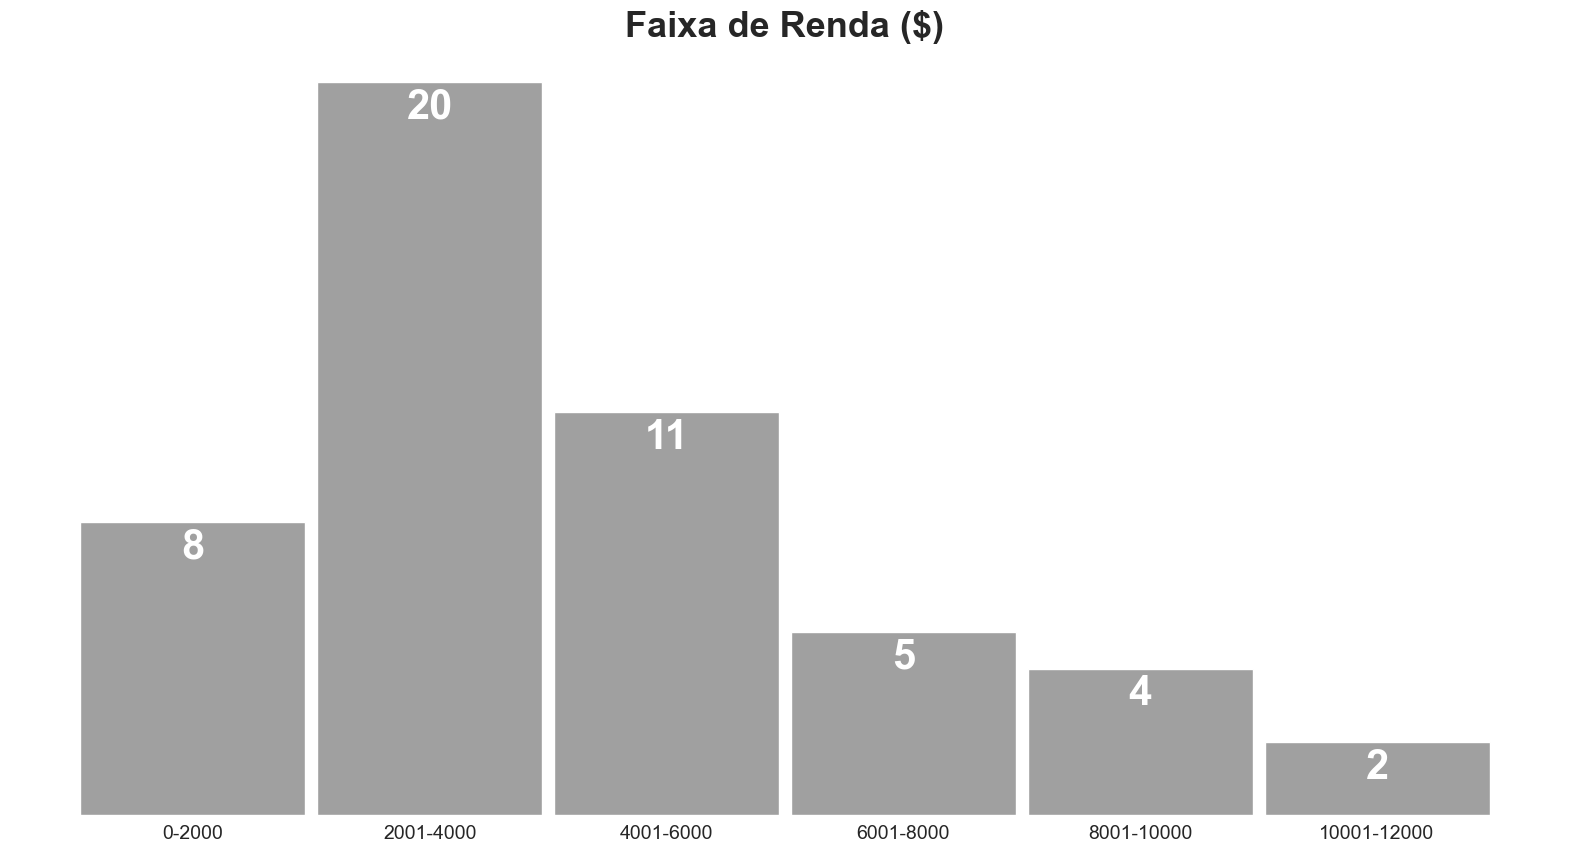

In [6]:
sns.set_style('white')
sns.set_palette('deep')
ax = sns.histplot(data=renda_mensal['Renda ($)'], color='grey', stat='count',bins=6,binrange=(0,12000),shrink=0.95, legend=False,kde=False)
ax.figure.set_size_inches(20,10)
ax.spines[:].set_visible(False)
ax.set_title('Faixa de Renda ($)',fontsize=26,weight='bold')
ax.set_yticks([0,2,4,6,8,10,12,14,16,18,20],labels='')
ax.set_xticks([1000,3000,5000,7000,9000,11000],labels=['0-2000','2001-4000','4001-6000','6001-8000','8001-10000','10001-12000'],fontsize=14)
ax.set_xlabel(None)
ax.set_ylabel(None)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height - 1,height ,ha="center",fontsize=30,weight='bold',color='white')
plt.show()



#### 2. Um analista do mercado acionário coletou os retornos mensais de duas ações que pretende indicar aos seus clientes. Calcule as estatísticas descritivas para as duas variáveis, incluindo o coeficiente de correlação entre os retornos.

In [7]:
acoes = pd.read_csv('açoes.csv')
acoes

,Meses,Ação 1,Ação 2
0,1,-0.0212,0.2645
1,2,0.2438,0.2086
2,3,0.2296,0.1248
3,4,-0.2018,0.0209
4,5,0.1296,0.2055
5,6,0.0615,0.6260
6,7,-0.1591,-0.1490
7,8,-0.1001,0.2580
8,9,-0.0265,0.1722
9,10,0.0776,0.0199


Média

In [8]:
acoes[['Ação 1','Ação 2']].mean().round(4)

Ação 1    0.0352
Ação 2    0.1511
dtype: float64

Mediana

In [9]:
acoes[['Ação 1','Ação 2']].median().round(4)

Ação 1    0.0370
Ação 2    0.1248
dtype: float64

Moda

In [10]:
acoes[['Ação 1','Ação 2']].mode() # Não tem

,Ação 1,Ação 2
0,-0.2018,-0.1490
1,-0.1591,-0.1410
2,-0.1111,-0.1059
3,-0.1001,-0.0056
4,-0.0674,0.0160
5,-0.0667,0.0199
6,-0.0557,0.0209
7,-0.0265,0.0334
8,-0.0212,0.0452
9,-0.0082,0.0753


1 e 3 Quartis

In [11]:
acoes[['Ação 1','Ação 2']].quantile(q=0.25)

Ação 1   -0.0612
Ação 2    0.0204
Name: 0.25, dtype: float64

In [12]:
acoes[['Ação 1','Ação 2']].quantile(q=0.75)

Ação 1    0.11605
Ação 2    0.23330
Name: 0.75, dtype: float64

8 e 9 Decis

In [13]:
acoes[['Ação 1','Ação 2']].quantile(q=0.8)

Ação 1    0.12596
Ação 2    0.26190
Name: 0.8, dtype: float64

In [14]:
acoes[['Ação 1','Ação 2']].quantile(q=0.9)

Ação 1    0.22350
Ação 2    0.42796
Name: 0.9, dtype: float64

27, 64 e 39 Percentis

In [15]:
acoes[['Ação 1','Ação 2']].quantile(q=0.27)

Ação 1   -0.05636
Ação 2    0.02084
Name: 0.27, dtype: float64

In [16]:
acoes[['Ação 1','Ação 2']].quantile(q=0.64)

Ação 1    0.076312
Ação 2    0.182500
Name: 0.64, dtype: float64

In [17]:
acoes[['Ação 1','Ação 2']].quantile(q=0.39)

Ação 1   -0.013660
Ação 2    0.062658
Name: 0.39, dtype: float64

Valor Máximo

In [18]:
acoes[['Ação 1','Ação 2']].max()

Ação 1    0.2814
Ação 2    0.6260
dtype: float64

Valor Mínimo

In [19]:
acoes[['Ação 1','Ação 2']].min()

Ação 1   -0.2018
Ação 2   -0.1490
dtype: float64

Amplitude

In [20]:
acoes[['Ação 1','Ação 2']].max() - acoes[['Ação 1','Ação 2']].min()

Ação 1    0.4832
Ação 2    0.7750
dtype: float64

Variância

In [21]:
acoes[['Ação 1','Ação 2']].var()

Ação 1    0.016698
Ação 2    0.041544
dtype: float64

Desvio Padrão

In [22]:
acoes[['Ação 1','Ação 2']].std()

Ação 1    0.129221
Ação 2    0.203822
dtype: float64

Erro Padrão

In [23]:
acoes[['Ação 1','Ação 2']].sem()

Ação 1    0.026944
Ação 2    0.042500
dtype: float64

In [24]:
(acoes[['Ação 1','Ação 2']].std()/np.sqrt(len(acoes[['Ação 1','Ação 2']])))

Ação 1    0.026944
Ação 2    0.042500
dtype: float64

Coeficiente de Variação

In [25]:
((acoes[['Ação 1','Ação 2']].std()/acoes[['Ação 1','Ação 2']].mean())*100).round(2)

Ação 1    367.06
Ação 2    134.86
dtype: float64

####    3. Em certo jogo, probabilidade de vitória (sucesso) a cada nova jogada é 1/6. Se forem feitas 10 jogadas, quais são as seguintes probabilidades:

#####    a. Ter vitória em 4 jogadas.

In [26]:
def binomial(kk,nn,pp):
    prob = (np.math.factorial(nn)/(np.math.factorial(kk)*np.math.factorial(nn-kk)))*(pp**kk)*(1-pp)**(nn-kk)
    prob_scipy = binom.pmf(kk,nn,pp)
    return prob, prob_scipy

result = binomial(4,10,1/6)
print(f'Binomial no braço: {result[0]:.3%}; Binomial scipy: {result[1]:.3%}')

Binomial no braço: 5.427%; Binomial scipy: 5.427%


#####    b. Ter vitória em pelo menos 7 jogadas. (Necessário somar as probabilidades além do 7)

In [27]:
def binomial2(kk,nn,pp):
    prob,prob_scipy = 0, 0
    for i in range(0,4):
        prob += (np.math.factorial(nn)/(np.math.factorial(kk+i)*np.math.factorial(nn-(kk+i))))*(pp**(kk+i))*(1-pp)**(nn-(kk+i))
        prob_scipy += binom.pmf(kk+i,nn,pp)
    return prob, prob_scipy
result = binomial2(7,10,1/6)
print(f'Binomial no braço: {result[0]:.4%}; Binomial scipy: {result[1]:.4%}')

Binomial no braço: 0.0268%; Binomial scipy: 0.0268%


####    4. (Fonte: Fávero e Belfiore, 2017, Cap. 5) Suponha que um aluno acerte três questões a cada cinco testes. Seja X o número de tentativas até o décimo segundo acerto. Determine a probabilidade de que o aluno precise fazer 20 questões para acertar 12.

In [28]:
# Binomial negativa (k,x,p) The scipy nbinom.pmf function should be read as:

#scipy.stats.nbinom.pmf(num_failures, num_successes, prob_of_success)

def negative_bin(k,x,p):
    k1 = k-1
    x1 = x-1
    dif = (x-1)-(k-1)
    prob = ((np.math.factorial(x1))/((np.math.factorial(k1))*(np.math.factorial(dif))))*(p**k)*((1-p)**(x-k))
    prob_scipy = nbinom.pmf(x-k,k,p)
    return prob,prob_scipy

result = negative_bin(12,20,0.6)
print(f'Binomial negativa no braço: {result[0]:.3%}; Binomial negativa scipy: {result[1]:.3%}')

Binomial negativa no braço: 10.782%; Binomial negativa scipy: 10.782%


####    5. (Fonte: Fávero e Belfiore, 2017, Cap. 5) Suponha que, em determinado hospital, 3 clientes são operados diariamente de cirurgia do estômago, seguindo uma distribuição Poisson. Calcule a probabilidade de que 28 clientes sejam operados na próxima semana (7 dias úteis).

In [29]:
#k = 28
#lamb = 3
def poisson1(k,l):
    prob = (np.exp(-l)*(l**k))/(np.math.factorial(k))
    prob_scipy = poisson.pmf(k,l)
    return prob, prob_scipy
result = poisson1(4,3)
print(f'Poisson no braço: {result[0]:.3%}; Poisson scipy: {result[1]:.3%}')

Poisson no braço: 16.803%; Poisson scipy: 16.803%


####    6. .Nos últimos meses, foram feitas medições do tempo decorrido entre o início e finalização de uma das etapas do processo de produção de certo produto. O tempo médio foi calculado em 26,5 minutos e o desvio padrão foi de 4,0 minutos. Sabendo que tal variável segue uma distribuição normal, identifique as seguintes informações:

#####    a. P(X>37)

In [30]:
x = 37
mu = 26.5
sigma = 4
z_score = (x-mu)/sigma
print('Z:', z_score)
from scipy.stats import norm
prob_scipy = 1 - norm.cdf(z_score)
print(f'Normal scipy: {prob_scipy:.3%}')

Z: 2.625
Normal scipy: 0.433%


#####    b. P(X<20)

In [31]:
x=20
z_score = (x-mu)/sigma
print('Z:', z_score)
prob_scipy = norm.cdf(z_score)
print(f'Normal scipy: {prob_scipy:.3%}')

Z: -1.625
Normal scipy: 5.208%


#####    c. P(22<X<28)

In [32]:
x1, x2 = 22, 28
z_score1, z_score2 = (x1-mu)/sigma, (x2-mu)/sigma
print('Z1:', z_score1)
print('Z2:', z_score2)
prob_scipy1 = norm.cdf(z_score1)
prob_scipy2 = norm.cdf(z_score2)
print(f'Normal1 scipy: {prob_scipy1:.3%} \nNormal2 scipy: {prob_scipy2:.3%}')
print(f'{prob_scipy1:.3%} + {prob_scipy2:.3%} = {prob_scipy2+prob_scipy1:.3%}')

Z1: -1.125
Z2: 0.375
Normal1 scipy: 13.029% 
Normal2 scipy: 64.617%
13.029% + 64.617% = 77.646%


####    7. (Fonte: Fávero e Belfiore, 2017, Cap. 8) Um grupo de 60 leitores fez uma avaliação de três livros de romance e, ao final, escolheram uma das três opções. Teste a hipótese nula de que não há diferença na preferência dos leitores, ao nível de significância de 5%.

In [33]:
livros = pd.DataFrame([[29,0.483,20],[15,0.25,20],[16,0.267,20],[60,1.0,60]],index=['A','B','C','Total'],columns=['Freq_obs','Proporcao','freq_esp'])
livros

,Freq_obs,Proporcao,freq_esp
A,29,0.483,20
B,15,0.250,20
C,16,0.267,20
Total,60,1.000,60


In [34]:
livros['residuos'] = livros.Freq_obs - livros.freq_esp
livros

,Freq_obs,Proporcao,freq_esp,residuos
A,29,0.483,20,9
B,15,0.250,20,-5
C,16,0.267,20,-4
Total,60,1.000,60,0


In [35]:
livros['x2'] = (livros.residuos**2)/livros.freq_esp
livros.at['Total','x2'] = livros['x2'].sum()
livros

,Freq_obs,Proporcao,freq_esp,residuos,x2
A,29,0.483,20,9,4.05
B,15,0.250,20,-5,1.25
C,16,0.267,20,-4,0.80
Total,60,1.000,60,0,6.10


In [36]:
nivel_sig = 0.05
deg_freedom = 2
crit_value = chi2.ppf(1-nivel_sig,deg_freedom)
val_x2 = livros.at['Total','x2']
#chi2.ppf(1-nivel_sig,deg_freedom)
print(f'The Chi-Square critical value is {crit_value:.3f}')


The Chi-Square critical value is 5.991


$H_{0}$ : Não há diferença na preferência dos leitores <br>

$H_{1}$: Há diferença na preferência dos leitores

Precisamos comparar os valores de $\chi^{2}_{T}$ (total) e $\chi^{2}_{C} (crítico)$.

In [37]:
if (val_x2 > crit_value):
    print(r'Rejeita-se H0: Há diferença na preferência dos leitores.')
else:
    print(r'Aceita-se H0: Não há diferença na preferência dos leitores.')

Rejeita-se H0: Há diferença na preferência dos leitores.


In [38]:
p_value = chisquare(livros['Freq_obs'],livros['freq_esp'],1)[1]

If p-value < $ \alpha $ rejeita-se $ H_{0} $ <br>

If p-value > $ \alpha $ não rejeita-se $ H_{0} $

In [39]:
if (p_value < nivel_sig):
    print(r'Rejeita-se H0: Há diferença na preferência dos leitores.')
else:
    print(r'Aceita-se H0: Não há diferença na preferência dos leitores.')

Rejeita-se H0: Há diferença na preferência dos leitores.


####   8. Foram coletados dados sobre a quantidade de chuva por dia (em milímetros), durante 14 dias, para dois locais distintos. O pesquisador notou que o local A aparenta ter maior variabilidade na quantidade chuva, comparativamente ao local B. Neste sentido, deseja testar a hipótese de que a variabilidade na quantidade de chuva é significativamente maior em A do que em B. Realize o teste F para testar tal hipótese.

In [40]:
A = [8.90,7.70,8.60,3.90,7.60,10.20,9.60,8.90,9.60,5.50,0.50,1.50,1.50,4.00]
B = [5.6,4.9,6.6,5.9,6.5,5.9,3.6,5.6,8.8,7.8,9.9,11.0,8.3,5.5]
data = pd.DataFrame()
data['A(mm)'],data['B(mm)'] = A,B
data.head(3)

,A(mm),B(mm)
0,8.9,5.6
1,7.7,4.9
2,8.6,6.6


In [41]:
var_a = data.var()[0]
var_b = data.var()[1]
display(var_a,var_b)

11.604395604395604

4.202692307692308

In [42]:
# Teste F Variâncias
nivel_sig = 0.05
ftest = var_a/var_b
print(f'O parâmetro resultante do teste F = {ftest:.4f}')

O parâmetro resultante do teste F = 2.7612


In [43]:
val_crit = f.ppf(1-nivel_sig,13,13) #(nivel de confiança, graus de liberdade no numerador, graus de liberdade no denominador)
print(f'O valor crítico F_c = {val_crit:.4f}')

O valor crítico F_c = 2.5769


In [44]:
p_value = 1-f.cdf(ftest,13,13)
p_value

0.03917205449902483

Vamos verificar tanto pelo p-value e pelo valor de $ F $ e $ F_{C} $ (crítico).

In [45]:
if (p_value < nivel_sig or ftest > val_crit):
    print(f'Rejeita-se H0: As variâncias das duas amostras são diferentes.')
else:
    print(f'Aceita-se H0: As variâncias das duas amostras são iguais.')

Rejeita-se H0: As variâncias das duas amostras são diferentes.


#### 9. (Fonte: Fávero e Belfiore, 2017, Cap. 7) Deseja-se comparar o tempo médio de espera para atendimento (min) em 2 hospitais. Para isso, coletou-se uma amostra com 20 pacientes em cada hospital. Verifique se há diferenças entre os tempos médios de espera nos dois hospitais. Considere α = 1%. Adicionalmente, calcule os intervalos de confiança para o tempo médio de espera nos dois hospitais.

In [46]:
hosp1 = [72,58,91,88,70,76,98,101,65,73,79,82,80,91,93,88,97,83,71,74]
hosp2 = [66,40,55,70,76,61,53,50,47,61,52,48,60,72,57,70,66,55,46,51]
data = pd.DataFrame()
data['Hospital 1'] = hosp1
data['Hospital 2'] = hosp2

Antes de realizarmos o **teste t**, vamos fazer o **teste F** para comparar as variâncias $ S^{2}_{maior} $ e $ S^{2}_{menor} $

$ F = \frac{S^{2}_{maior}}{S^{2}_{menor}}$

In [47]:
var1 = data.var()[0]
var2 = data.var()[1]
print(f'Para o Hospital 1, var1 = {var1:.4f}')
print(f'Para o Hospital 2, var2 = {var2:.4f}')


Para o Hospital 1, var1 = 137.7368
Para o Hospital 2, var2 = 96.8000


In [48]:
if var1 > var2:
    ftest = var1/var2
else:
    ftest = var2/var1
print(f'O parâmetro resultante do teste, F = {ftest:.4f}')

O parâmetro resultante do teste, F = 1.4229


In [49]:
nivel_sig = 0.01
val_crit = f.ppf(1-nivel_sig,len(data['Hospital 1']) - 1,len(data['Hospital 2']) - 1) #(nivel de confiança, graus de liberdade no numerador, graus de liberdade no denominador)
print(f'O valor crítico F_c = {val_crit:.4f}')

O valor crítico F_c = 3.0274


In [50]:
p_value = 1-f.cdf(ftest,len(data['Hospital 1']) - 1,len(data['Hospital 2']) - 1)
p_value

0.22460949688391607

In [51]:
if (p_value < nivel_sig or ftest > val_crit):
    print(f'Rejeita-se H0: As variâncias das duas amostras são diferentes.')
else:
    print(f'Aceita-se H0: As variâncias das duas amostras são iguais.')

Aceita-se H0: As variâncias das duas amostras são iguais.


Como **pelo teste F** as **variâncias são iguais**, usaremos a seguinte equação para o teste t: <br>

###### $$ T = \frac{\bar{X_{1}} - \bar{X_{2}}}{S_{p}\cdot \sqrt{\frac{1}{n_{1}}+\frac{1}{n_{2}}}} $$ <br><br><br>         $$ S_{p} = \sqrt{\frac{(n_{1}-1)S^{2}_{1} + (n_{2}-1)S^{2}_{2}}{n_{1}+n_{2}-2}} $$ <br><br><br>     Graus de Liberdade $= n_{1}+n_{2}-2$

In [52]:
# no braço o valor de T
n1 = len(data['Hospital 1'])
n2 = len(data['Hospital 2'])
print(f'Graus de liberdade = {n1+n2-2}')

sp = np.sqrt(((n1-1)*var1 + (n2-1)*var2)/(n1+n2-2))
display(sp)
T = (data['Hospital 1'].mean() - data['Hospital 2'].mean())/(sp*np.sqrt((1/n1)+(1/n2)))
print(f'O valor do teste T = {T:.4f}')

Graus de liberdade = 38


10.829054485624845

O valor do teste T = 6.9208


In [53]:
nivel_sig = 0.01
val_crit = t.ppf(1-nivel_sig/2,n1+n2-2) #(nivel de confiança, graus de liberdade)
print(f'O valor crítico t_c = {val_crit:.4f}')

O valor crítico t_c = 2.7116


In [54]:
from scipy.stats import ttest_ind
t_stat,p_value = ttest_ind(data['Hospital 1'],data['Hospital 2'])
display(t_stat)
display(p_value)
if p_value <= nivel_sig:
    print('Rejeita-se H0: Há diferença no tempo de espera dos hospitais.')
else:
    print('Aceita-se H0: Não há diferença no tempo de espera dos hospitais.')

6.920824033665959

3.147827649441996e-08

Rejeita-se H0: Há diferença no tempo de espera dos hospitais.


Agora o **intervalo de confiança**:

In [55]:
import scipy.stats as st

#ic1 = t.interval(alpha=0.99,df=n1-1,loc=data.mean()[0],scale=data.sem()[0])
print(f'O intervalo de confiança para o Hospital 1 é {t.interval(alpha=0.99,df=n1-1,loc=data.mean()[0],scale=data.sem()[0])}')
print(f'O intervalo de confiança para o Hospital 2 é {t.interval(alpha=0.99,df=n2-1,loc=data.mean()[1],scale=data.sem()[1])}')

O intervalo de confiança para o Hospital 1 é (73.99210839145069, 89.00789160854931)
O intervalo de confiança para o Hospital 2 é (51.50594386581019, 64.09405613418981)


#### 10. (Fonte: Fávero e Belfiore, 2017, Cap. 7) Um fabricante de iogurtes desnatados afirma que a quantidade de calorias em cada pote é 60 cal. Para verificar se essa informação procede, uma amostra aleatória com 36 potes é coletada, observando-se que a quantidade média de calorias é de 65 cal com desvio-padrão 3,5. Aplique o teste adequado e verifique se a afirmação do fabricante é verdadeira, considerando o nível de significância de 5%.

In [56]:
n=36
nivel_sig = 0.05
x_med = 65
x_0 = 60
s = 3.5
T = (x_med - x_0)/(s/np.sqrt(n))
T

8.571428571428571

In [57]:
val_crit = t.ppf(1-nivel_sig/2,n-1) #(nivel de confiança, graus de liberdade) bicaudal
print(f'O valor crítico t_c = {val_crit:.4f}')

O valor crítico t_c = 2.0301


In [58]:
p_value = (1-t.cdf(T,n-1))*2
if p_value <= nivel_sig:
    print('Rejeita-se H0: A quantidade de calorias não é igual a 60.')
else:
    print('Aceita-se H0: A quantidade de calorias é igual a 60.')


Rejeita-se H0: A quantidade de calorias não é igual a 60.


#### 11. Em uma indústria alimentícia, para a preparação de certo produto, a quantidade padrão de sal são 8g com desvio padrão igual a 1g. Na análise de uma amostra de 85 produtos, foi observada uma quantidade média de sal de 8,25g. Avalie se a quantidade observada na amostra pode ser considerada estatisticamente maior, ao nível de significância de 5%.

In [59]:
x0 = 8
xmed = 8.25
despop = 1
n = 85
nivel_sig = 0.05
z = (xmed - x0)/(despop/np.sqrt(n))
z

2.3048861143232218

In [60]:
val_crit = norm.ppf(1-nivel_sig) #(nivel de confiança, graus de liberdade no numerador, graus de liberdade no denominador)
print(f'O valor crítico F_c = {val_crit:.4f}')

O valor crítico F_c = 1.6449


In [61]:
p_value = 1-norm.cdf(z)
p_value

0.01058647624307385

In [62]:
if p_value <= nivel_sig:
    print('Rejeita-se H0: As quantidades são diferentes.')
else:
    print('Aceita-se H0: As quantidades são iguais.')

Rejeita-se H0: As quantidades são diferentes.


#### 12. Em uma amostra de 425 medições, observou-se que o peso médio dos produtos que foram medidos é 226g, com desvio padrão de 10g. Estabeleça o intervalo de confiança para esta média, sabendo que o desvio padrão observado é exatamente seu valor histórico. Considere um nível de confiança de 95%.

In [63]:
n=425
xmed = 226
s = 10
nivel_sig=0.05
norm.interval(1-nivel_sig,loc=xmed,scale=(s/np.sqrt(n)))

(225.04927781992174, 226.95072218007826)